In [2]:
pip install h2o

  Using cached h2o-3.32.1.3.tar.gz (164.8 MB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854343 sha256=8a5449c1a7855d226297d58f287807daf88bd180ed6046aa879e0d867eaefd3b
  Stored in directory: /home/yutaro/.cache/pip/wheels/94/de/98/a3badf41ac2c2b02dc1a21c9b8f8d435b5eb68a52f9df8d3c1
Successfully built h2o
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

  Using cached scipy-1.6.3-cp38-cp38-manylinux1_x86_64.whl (27.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import os
import h2o
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /home/yutaro/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkxv1sv0p
  JVM stdout: /tmp/tmpkxv1sv0p/h2o_yutaro_started_from_python.out
  JVM stderr: /tmp/tmpkxv1sv0p/h2o_yutaro_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_yutaro_593tmp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.941 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [8]:
def load_model(name, path='Video_Game_Results'):
    model = h2o.load_model(str(path) + str(name))
    print(model)
    print(model.mse(xval=True))

    print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
    print(str(model))
    print("*********************************************")
    print(model.scoring_history())
    print(model.summary().as_data_frame())

    df = model.summary().as_data_frame()
    print("**********************************")
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    print(type(str(model)))

    myText = open(rf'{str(path) + str(name)}.txt', 'w')
    myString = str(model)
    myText.write(myString)
    myText.close()
    print("--------------------------")
    print(type(model.save_model_details))
    df.to_latex(f'{str(path) + str(name)}')

    return model

In [9]:
def save_accuracy(path):
    df = pd.DataFrame({'MSE': []})
    try:
        os.mkdir(f'{path + "meta"}')
    except:
        pass

    for filename in os.listdir(path):
        try:
            model = h2o.load_model(str(path) + str(filename))
            #print()
            #df.append(dict(MSE=model.mse(xval=True)), ignore_index=True)

            temp_df = pd.DataFrame({'MSE': [model.mse(xval=True)]})
            #print(df)

            df = df.append(temp_df)

            #scores = model.scoring_history()
            #print(model)

            #if model.summary():
             #   summary = model.summary().as_data_frame()

            #lse:
             #   summary = pd.DataFrame({'Placeholder': ["Stackensenble has no summary"]})

           # print(summary)
           # print("+++++++++++++++++++++++++++++++++++++")

          #  if scores is None:
                #scores = pd.DataFrame()
           #     pass
            #if not scores.empty:
             #   pass
                #scores.to_latex(f'{str(path) + "meta/" + str(filename) + "_" + "scores"}')
            #else:
             #   pass
            #summary.to_latex(f'{str(path) + "meta/" + str(filename) + "_" + "summary"}')

        except:
            pass
    df.index = np.arange(len(df))
    df = df[:30]
    #df.to_latex(f'{str(path) + "meta/" + str(filename) + "_" + "MSEjoined"}')

    return df


0     0.959653
1     0.029339
2    -0.860966
3    -1.560796
4    -0.033968
5    -1.321565
6     0.778383
7     0.011063
8     0.096882
9     0.910768
10    0.413433
11   -1.271642
12    0.531379
13   -0.058110
14    1.468604
15    1.769711
16    0.430074
17    0.073521
18    0.924833
19    0.700320
20    1.938838
21    0.472532
22   -1.072865
23    0.184907
24   -1.220243
25   -1.184000
26   -1.227524
27   -1.175625
28   -1.251380
29    0.544442
Name: MSE, dtype: float64


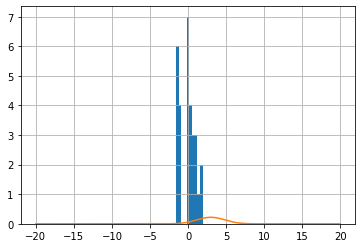

0     1.129475
1    -0.673909
2    -0.572440
3    -0.655244
4     2.012265
5    -0.572865
6    -0.651437
7    -0.040156
8     0.507292
9    -0.612229
10   -0.640646
11    1.981803
12   -0.651682
13    1.113158
14   -0.612122
15   -0.675381
16   -0.600433
17   -0.440585
18   -0.398124
19   -0.519801
20   -0.298958
21   -0.654212
22   -0.615350
23   -0.645392
24    1.987488
25    2.127776
26    1.525231
27   -0.614768
28   -0.620343
29   -0.618410
Name: MSE, dtype: float64


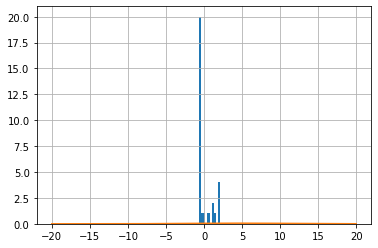

0     0.298861
1     0.292846
2    -0.325107
3     0.299039
4     0.791294
5    -0.168850
6     0.429206
7     0.183386
8     0.097801
9     0.580652
10   -0.076239
11    1.054314
12    0.584927
13   -0.399202
14    0.283103
15    0.789550
16    0.658648
17   -0.088800
18    0.417423
19    0.282893
20   -0.096566
21   -0.176478
22   -0.002958
23    0.548327
24    0.716882
25   -3.456799
26   -3.386727
27   -0.099298
28    0.215625
29   -0.247752
Name: MSE, dtype: float64


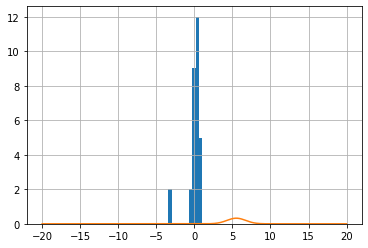

0     0.206528
1    -1.075806
2    -0.667997
3    -0.241077
4     0.919600
5     1.449910
6     0.419264
7    -2.184773
8     0.835470
9    -0.141524
10   -1.104677
11   -0.373241
12   -0.600088
13    1.367891
14    1.230778
15    0.966900
16    1.834175
17   -1.203717
18    1.164434
19   -0.991071
20    0.208262
21   -0.035287
22   -0.703103
23    0.852199
24   -0.719545
25    0.470725
26   -0.708733
27    0.833371
28   -0.637185
29   -1.371683
Name: MSE, dtype: float64


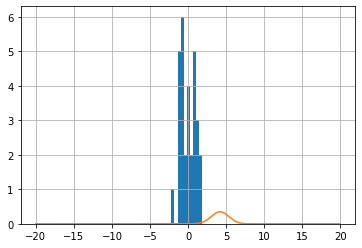

0     0.217099
1     0.431307
2     0.512415
3     1.468534
4    -0.880813
5    -1.190349
6    -0.882918
7     0.455361
8     0.810436
9    -1.199339
10    0.314147
11    0.552003
12   -1.010400
13   -1.211599
14   -0.931981
15   -0.972285
16   -1.253171
17    0.960186
18    1.064811
19   -0.928310
20   -1.018622
21    0.184191
22    1.119029
23    1.116574
24    0.554972
25    0.957367
26    1.998088
27   -0.887548
28   -1.233491
29    0.884305
Name: MSE, dtype: float64


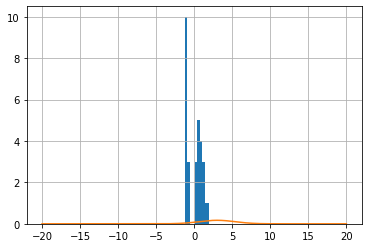

In [ ]:

for items in os.listdir("./"):
    df = save_accuracy('/home/yutaro/Bocconi/Video_Game_Results/' + items + '/')

    mean = df['MSE'].mean()
    var = df['MSE'].var()
    normalized = (df['MSE'] - mean)/((var)**0.5)

    print(normalized)
    normalized.hist(bins=10)

    x_axis = np.arange(-20, 20, 0.01)
    plt.plot(x_axis, norm.pdf(x_axis, mean, (var)**0.5))

    plt.show(block=True)